# <center>Entrega 2 </center>

## Ejercicio 1. Segmentación – Thresholding [0,4 puntos]

Lo primero de todo es cargar la imágen que vamos a utilizar y pasarlo a una escala de grises

In [1]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt

# Cargamos la imagen tal cual está guardada
img = cv2.imread('114591144943.png',0) #ponemos el nombre de una imagen que se encuentre en el mismo directorio 
#El segundo parámetro de la función cv2.imread() es una etiqueta (flag) que puede ser: 
#  IMREAD_UNCHANGED = -1,
#  IMREAD_GRAYSCALE = 0,
#  IMREAD_COLOR = 1.
img

array([[114, 114, 114, ..., 102, 102, 102],
       [114, 114, 114, ..., 102, 102, 102],
       [114, 114, 114, ..., 102, 102, 102],
       ...,
       [120, 120, 120, ...,  58,  62,  63],
       [120, 120, 120, ...,  63,  64,  63],
       [120, 120, 120, ...,  65,  68,  65]], dtype=uint8)

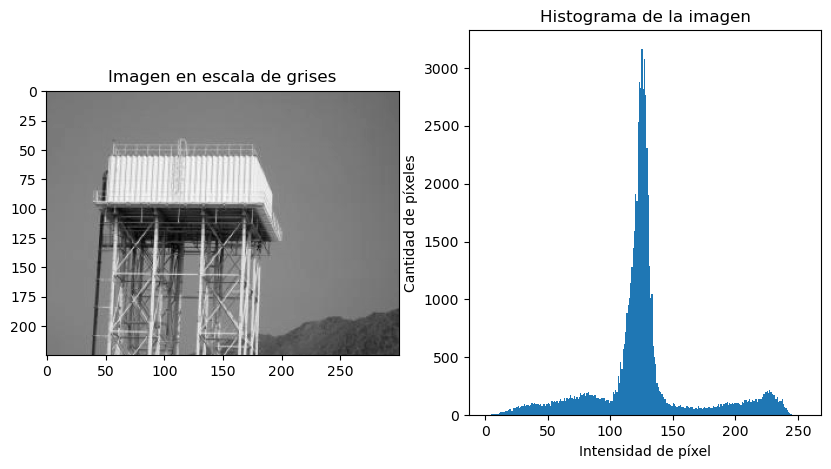

<Figure size 640x480 with 0 Axes>

In [2]:
# Calculamos el histograma de la imagen en escala de grises
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# Creamos un subplot para mostrar el histograma y la imagen
plt.figure(figsize=(10, 5))

# Mostramos la imagen
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen en escala de grises')

# Mostramos el histograma
plt.subplot(1, 2, 2)

# Añadimos etiquetas
plt.xlabel('Intensidad de píxel')
plt.ylabel('Cantidad de píxeles')
plt.title('Histograma de la imagen')
plt.hist(img.ravel(),256,[0,256]); plt.show()

# Mostrar el subplot
plt.tight_layout()
plt.show()


**1-2)Determina razonadamente mediante la visualización del histograma el umbral que consideras podrían proporcionar una primera aproximación a una segmentación adecuada del objeto.**

Para seleccionar el umbral en mi imagen, tenemos que tener en cuenta el histograma y la propia imagen. Podemos ver en la imagen que resaltan 3 aspectos (la estructura, el cielo y una montaña más oscura). Para quedarnos la estructura que es lo que nos interesa, debemos seleccionar un umbral que separe este de los otros dos, se puede apreciar que el color de la montaña y el cielo es más gris oscuro que el de la estructura, se puede ver claramente en el histograma que el pico de niveles de gris representa el cielo gris, por lo que es una buena idea usar un umbral que este pasado este pico, un valor alrededor de 150 debe dar un buen resultado

**1-3)Aplica el umbral seleccionado en el apartado 2 usando la función threshold de OpenCV y comenta el resultado obtenido.**

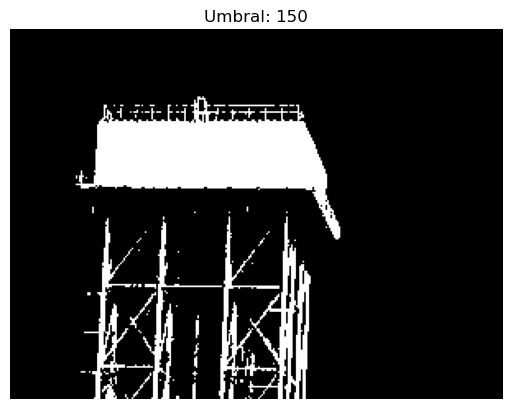

In [3]:
# definimos el nivel del umbral
umbral_seleccionado = 150

# umbralizamos
_, img_umbralizada = cv2.threshold(img, umbral_seleccionado, 255, cv2.THRESH_BINARY)

# Mostramos el umbral
plt.imshow(img_umbralizada, cmap='gray')
plt.title(f'Umbral: {umbral_seleccionado}')
plt.axis('off')
plt.show()


Con un umbral de 150 píxeles obtenemos un muy buen resultado, tengo totalmente diferenciado el edificio del cielo y el suelo(negro). Quizás se puede afinar un poco más el umbral aunque me parece que el resultado es bastante bueno, también diferencia la estructura sobre la que se sostiene del fondo

**1-4)Utiliza la función threshold de OpenCV para aplicar el método de Otsu, y comenta el resultado obtenido con respecto a la segmentación obtenida previamente.**

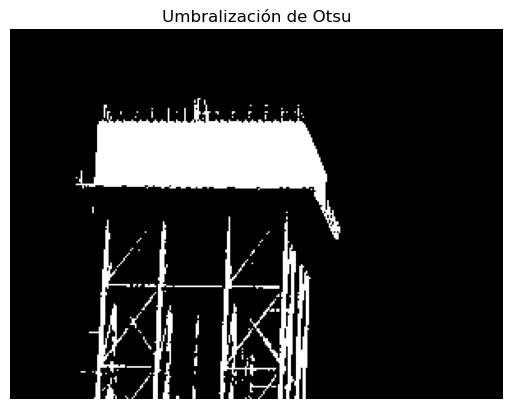

In [4]:
#  Aplicamos Otsu como se puede ver en la documentacion dada en el enunciado
_, img_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostramos la imagen resultante
plt.imshow(img_otsu, cmap='gray')
plt.title('Umbralización de Otsu')
plt.axis('off')
plt.show()


El resultado trás aplicar Otsu y el umbral definido por mi son parecidos, ambos capturan bien la silueta del "edificio", pero el de otsu parece tener un poquito más de detalle en algunas zonas, como en las vigas. El umbral que he seleccionado y el que ha usado otsu deben ser bástante parecidos

**1-5)Implementa una función que calcule el coeficiente Dice comparando las segmentaciones obtenidas con la imagen "ground truth" proporcionada en el set de datos. Compara los dos resultados anteriores en términos de este coeficiente**

Lo primero que tengo que hacer sobre la imagen "grouth truth" es transformarla pues el contorno esta coloreado en rojo , por lo que tendré que convertir este canal rojo a blanco y todo lo demás a negro

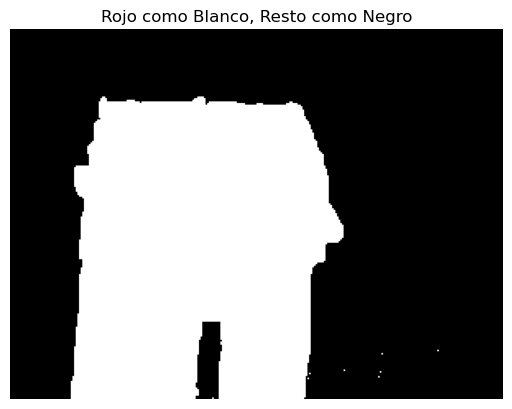

In [10]:
# cargamos la imagen gt dada en el conjunto
img_gt = cv2.imread('114591144943_10.png',1)

# Detectamos el rojo y lo cambiamos
lower_red = np.array([0, 0, 100])
upper_red = np.array([100, 100, 255])
img_gt_mask = cv2.inRange(img_gt, lower_red, upper_red)

# Mostrar la imagen resultante
plt.imshow(img_gt_mask, cmap='gray')
plt.title('Rojo como Blanco, Resto como Negro')
plt.axis('off')
plt.show()

Una vez tenemos preparado el gt(ground truth) lo que tenemos que hacer es definir la función de dice.
La función de dice no es más que aplicar la formula:

     dice(A,B) = 2 * |intersection(A,B) | / ( |A| + |B| )

Que nos indicará lo parecida que son los resultados de las imágenes (1 si son idénticas o 0 si no se parecen en nada)

In [15]:
# definimos al funcion DICE
def dice(pred, true):
    # dice(A,B) = 2 * |intersection(A,B) | / ( |A| + |B| )
    dice = (np.sum(pred[true==255]) * 2.0) / (np.sum(pred) + np.sum(true))
    return dice

In [16]:
dice_score = dice(img_umbralizada, img_gt_mask) 
print ("Indice de Dice con mi imagen: {}".format(dice_score))

Indice de Dice con mi imagen: 0.5441659760523533


In [17]:
dice_score = dice(img_otsu, img_gt_mask) 
print ("Indice de Dice con otsu: {}".format(dice_score))

Indice de Dice con otsu: 0.5123532503942527


In [18]:
dice_score = dice(img_otsu, img_umbralizada) 
print ("Indice de Dice mi umbral con otsu: {}".format(dice_score))

Indice de Dice mi umbral con otsu: 0.9589550199486254


Podemos ver en los índices de dice que los resultados con la imagen que nos daban esta alrededor de un 55% de similitud, podemos ver que esto se puede deber a que en mi caso y el de otsu, al definir un umbral más adecuado hemos diferenciado toda la parte de la estructura(las vigas) del entorno, cosa que la imagen gt no hace, ya que solo pinta un rectangulo en la figura.

Como añadido he comparado mi imagen con mi umbral con el de otsu y he obtenido una similitus altísima (95.8). Ya que al tener un umbral parecido ambas imágenes son casi idénticas

## Ejercicio 2. Segmentación basada en clustering - MeanShift [0,7 ptos.]

**1.Utiliza el fragmento de código que aparece al final del enunciado (Fragmento de código 2) para capturar un video desde la cámara web del equipo y almacenarlo en el fichero "video.avi". En el video, que debe ser breve, debe aparecer un objeto en movimiento que se rote en algún momento.**

In [12]:
import cv2

video_capture = cv2.VideoCapture(0)  # Se abre la primera cámara (y la única) disponible en el equipo
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Se indica que se va a utilizar el códec "xvid"
output = cv2.VideoWriter('video.avi', fourcc, 30.0, (640, 480))  # Archivo a guardar, con 30 FPS y con tamaño 640x480

while video_capture.isOpened():  # Mientras no se cierre (con la tecla "q") la grabación
    ret, frame = video_capture.read()  # ret es True si es correcto y False cuando ha terminado el fichero o la grabación
    
    # Si ret es False, es que el frame no se obtiene bien o que el vídeo ha llegado a su fin
    if not ret:
        print("ret es False, ¿ha finalizado el vídeo?")
        break
    
    output.write(frame)  # Se escribe en el archivo de output el frame actual
    cv2.imshow('frame', frame)  # Muestra cada frame que se está capturando en una ventana
    
    if cv2.waitKey(1) == ord('q'):  # Pulsar la tecla "q" para terminar la grabación
        break

video_capture.release()  # Se libera el "VideoCapture"
output.release()  # Se libera el archivo de output

**2.Adapta el código anterior (Fragmento de código 1) para hacer seguimiento del objeto en movimiento que aparece en el video capturado.**

Aquí muestro el código que nos dan y después de este mi modificación

In [19]:
import cv2
import numpy as np

video = cv2.VideoCapture("video.avi")
_, first_frame = video.read()

x = 200
y = 60
width = 40
height = 40

roi = first_frame[y: y + height, x: x + width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0, 180])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    success, frame = video.read()
    
    if success == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        mask = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

        _, track_window = cv2.meanShift(mask, (x, y, width, height), term_criteria)
        
        x, y, w, h = track_window
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        cv2.imshow("Mask", mask)
        cv2.imshow("Frame", frame)
        
        k = cv2.waitKey(1) & 0xff
        if k == ord('q'):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()


Y aquí presento mi código adaptado

In [30]:
import cv2
import numpy as np

video = cv2.VideoCapture("video.avi")
_, first_frame = video.read()

x = 200
y = 60

# Aumento el tamaño de la ventana
width = 250
height = 250

# Especificamos el rango de color verde en HSV (por que mi objeto es verde)
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

roi = first_frame[y: y + height, x: x + width]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0, 180])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    success, frame = video.read()
    
    if success == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # He utilizado inRange en vez de roi ya que he conseguido un mejor resultado así
        #mask = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        mask = cv2.inRange(hsv, lower_green, upper_green)

        _, track_window = cv2.meanShift(mask, (x, y, width, height), term_criteria)
        
        x, y, w, h = track_window
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        cv2.imshow("Mask", mask)
        cv2.imshow("Frame", frame)
        
        k = cv2.waitKey(1) & 0xff
        if k == ord('q'):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()


**3.Explica detalladamente los cambios que has tenido que realizar para que el seguimiento funcione correctamente.**

En mi caso he realizado tres cambios:

    *Aumentar el tamaño de la ventana para que pueda abarcar el tamaño del objeto a seguir (en mi caso un cuaderno verde)
    *He definido un rango de tono verde para que la máscara se centre en mi objeto que es de este color
    *He definido una máscara sustituyendo calcBackProject por inRange, esta función me permite definir una máscara basada en el rango de color de mi objeto de interés(cuaderno) en el espacio de color HSV.

**4.Explica detalladamente qué objetivo tiene la llamada a la función "calcBackProject" dentro del método de seguimiento.**

La función calbackproject sirve para encontrar la distribución de probabilidad de los píxeles de una imagen de entrada basándose en un histograma previamente calculado. se utiliza normalmente  con la finalidad de crear una máscara que resalte las regiones de la imagen que se asemejan al objeto de interés que queremos  basándose en su histograma de color.Esta máscara se usa luego en algoritmos de seguimiento(MeanShift o CamShift), para localizar y rastrear el objeto en el video.

En conclusión, ayuda a resaltar partes de una imagen en función de un color que especifiquemos.

**5.Explica detalladamente qué espacio de características se está usando en este caso.**

En este caso estamos usando el espacio HSV, que es un modelo similar al HSI

    *Hue: Representa el tono del color (color dominante tal y como lo percibimos). 
    *Saturation: Representa la cantidad de luz mezclada con el color dominante
    *Value: Representa la intensidad del color(brillo del color)


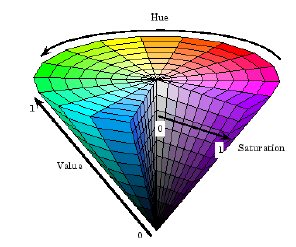

**6. Describe (relacionándolo con lo visto en la asignatura) qué función concreta tiene el método MeanShift dentro del seguimiento del objeto.**

El método MeanShift se usa para ajustar iterativamente la posición del objeto en cada frame del video, basándose en la distribución de color del objeto en el espacio de características HSV.

Como hemos visto en teoría el método Mean-Shift es un algoritmo de clustering que agrupa los datos en función de su densidad, en nuestro caso(seguimiento de objetos) localiza la posición del objeto en cada frame

## Ejercicio 3 - Extracción de características - Harris, SIFT, ORB [0,4 ptos.]

**Selecciona dos frames del video realizado en el ejercicio anterior, en los que el objeto aparezca en distintas posiciones de rotación. Calcula los tres tipos de puntos característicos a ambas imágenes y explica el resultado obtenido. Razona cuál o cuáles de ellos (Harris, SIFT, ORB) podría utilizarse para hacer un seguimiento del objeto en vídeo.**

In [52]:
# Nos quedamos con los frames 1 y 110 pues muestran la imagen en varios posiciones
filename = 'frame1.jpg'
frame1 = cv2.imread(filename)

filename = 'frame110.jpg'
frame2 = cv2.imread(filename)

def harris(frame):
    # Convertimos el frame a escala de grises
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculamos los puntos de interés de Harris
    harris = cv2.cornerHarris(gray_frame, 2, 3, 0.04)
    
    # Aplicamos una operacion de dilatacion
    harris = cv2.dilate(harris,None)

    # Creo una copia a color para mostrar los puntos
    res = frame.copy()
    
    # Definimos un umbral
    umbral = 0.001 * harris.max()
    
    # Aquellos valores que superen el umbral se marcaran los puntos de interés en la imagen original con un color a especificar(rojo en mi caso)
    res[harris > umbral] = [255, 0, 0]

    # mostramos la imagen
    plt.imshow(res)
    plt.title('Harris')
    plt.axis('off')
    plt.show()


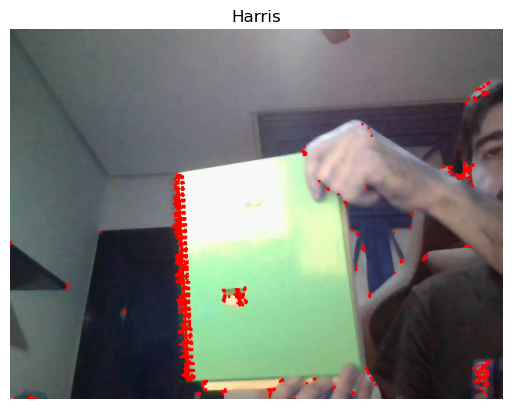

In [53]:
harris(frame2)

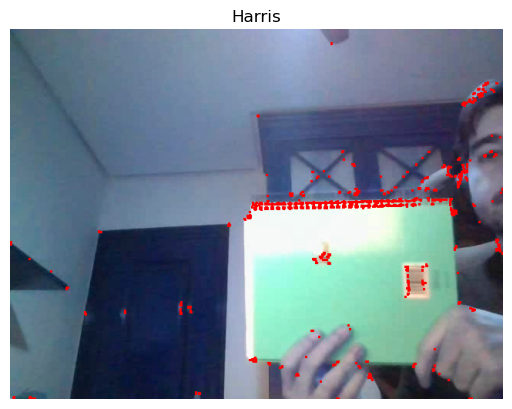

In [54]:
harris(frame1)

Lo que hacemos con Harris es detectar los puntos de interés del objeto

Podemos ver que se enfoca principalmente en la parte del encuadernado del cuaderno, aunque se ven que ha detectado puntos de interés en mis manos donde coincide con el cuaderno , la puerta y demás puntos del entorno donde se presentan esquinas.
Los resultados en ambas imágenes es muy parecido ya que Harris es invariante a la traslación y rotación

# **Sift**

In [61]:
def SIFT(image):
    # Convertimos la imagen a gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Inicializamos SIFT
    sift = cv2.SIFT_create()
    # Detectamos los puntos claves
    keypoints = sift.detect(gray, None)
    #hacemos una copia de la imagen
    im=image.copy()
    # Dibujamos los puntos de interes
    img_with_keypoints = cv2.drawKeypoints(gray, keypoints, im, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return img_with_keypoints

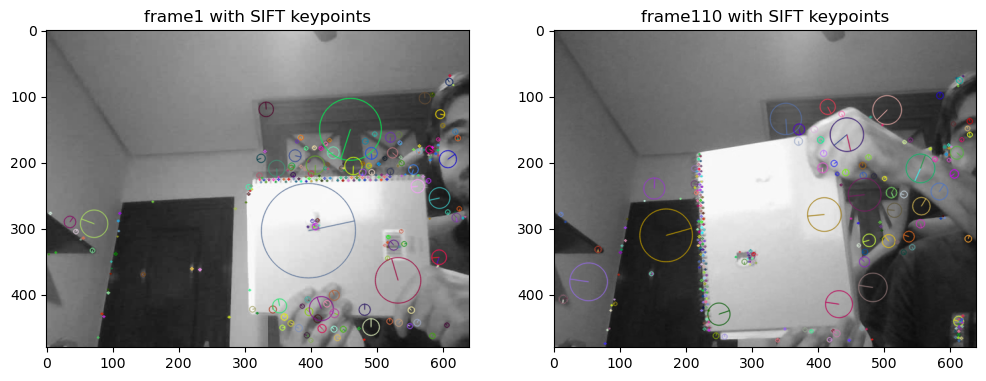

In [63]:
# cartgamos las imagenes
img = cv2.imread('frame1.jpg')
img2 = cv2.imread('frame110.jpg')

# Detectamos puntos clave con SIFT para el frame1
img_with_keypoints1 = SIFT(img)
# Detectar puntos clave con SIFT para el frame110
img_with_keypoints2 = SIFT(img2)

# Mostrar las imágenes y los puntos clave en un subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(img_with_keypoints1, cv2.COLOR_BGR2RGB))
axes[0].set_title('frame1 with SIFT keypoints')

axes[1].imshow(cv2.cvtColor(img_with_keypoints2, cv2.COLOR_BGR2RGB))
axes[1].set_title('frame110 with SIFT keypoints')

plt.show()

SIFT Scale Invariante Feature Transform 

Lo que podemos ver también con sift es la orientación de los puntos característicos donde esta es más distintiva. En este caso podemos ver que muestra muchos puntos de interés en el encuadernado aunque también vemos que enfatiza muchas esquinas y regiones donde cambian los píxeles (como en el mobiliaro del fondo) 

# **ORB**

In [70]:
def ORB(image):
    # Convertimos la imagen a gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Inicializamos ORB con orb_create
    orb = cv2.ORB_create()
    
    # Detectamos los puntos clave y descriptores y los guardamos en dos variables
    keypoints, descriptors = orb.detectAndCompute(gray_image, None) 
    
    # dibujamos los keypoints
    image_with_k = cv2.drawKeypoints(image, keypoints, None)
    #Devolvemos la imagen
    return image_with_k

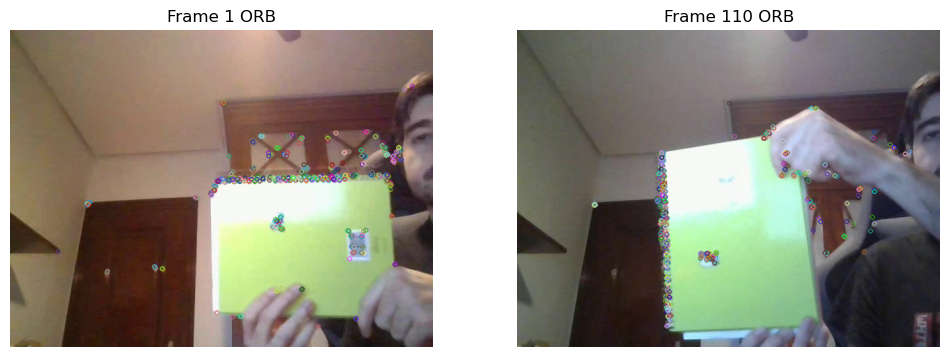

In [71]:
# Cargamos las imagenes/frame
frame1 = cv2.imread("frame1.jpg")
frame110 = cv2.imread("frame110.jpg")

# Detectar y dibujar los puntos clave en cada imagen
frame1_with_keypoints = ORB(frame1)
frame110_with_keypoints = ORB(frame110)

# Mostramos los dos frames
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(frame1_with_keypoints, cv2.COLOR_BGR2RGB))
axes[0].set_title("Frame 1 ORB")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(frame110_with_keypoints, cv2.COLOR_BGR2RGB))
axes[1].set_title("Frame 110 ORB")
axes[1].axis('off')

plt.show()

En el caso de ORB podemos ver que los puntos e las características locales Sin embargo, a diferencia de SIFT, ORB no calcula una orientación para cada punto clave detectado.

Podemos ver en los tres casos los resultados son bastante homogéneos, las funciones detectan puntos de interés en el contorno del cuaderno,además de enfatizar secciones del fondo donde se producen cambios significativos en los píxeles

Este caso nos da una solución un poco menos detallada que SIFT, pero es más barata computacionalmente hablando

**Razona cuál o cuáles de ellos (Harris, SIFT, ORB) podría utilizarse para hacer un seguimiento del objeto en vídeo.**

Las dos opciones que considero buenas son SIFT y ORB ya que son aunque harris tambien es invariante a traslación y rotación en el plano (cosa que hacemos en el video) no lo es a cambios de escala, y en un video es algo que puede ocurrir con bastante normalidad

Si tuviese que quedarme con solo 1 me quedaría con SIFT, tiene mayor calidad que ORB, la velocidad es más lenta pero para este tipo de video no nos importa,en cambio si fuese para videos en vivo donde necesitáramos más velocidad sacrificando precisión me quedaría con ORB, ya que este se usa en transmisiones en vivo

# Bilbiografia

https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html

https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html

Imágenes - https://www.wisdom.weizmann.ac.il/~vision/Seg_Evaluation_DB/download/Weizmann_Seg_DB_1obj.ZIP

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

https://mikhail-kennerley.medium.com/a-comparison-of-sift-surf-and-orb-on-opencv-59119b9ec3d0

https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html

https://amroamroamro.github.io/mexopencv/matlab/cv.ORB.detectAndCompute.html

Vision por ordenador - Diapositivas teoría - Enseñanza virtual